# 환경 뉴스 텍스트 마이닝
## 텍스트 마이닝의 3단계

### 1. 데이터 수집 (Crawling)
##### 1-1. PYTHON 
* html Parsing
* BeautifulSoup 패키지

##### 1-2. 출처
* 네이버 환경 뉴스의 1년간 헤드라인

### 2. 형태소 분석 (NLP) (Konlpy) 
* 형태소 : 의미를 가진 가장 작은 말의 단위. 더 나누면 뜻을 잃어버림. 
* 형태소 분석 개요 
  * 문서(document) > 문단(paragraph) > 문장(sentence) > 어절 > 형태소 > 음절

##### 2-1) 빈도분석 (Counter 함수)
  * okt 객체를 생성
  * nouns 함수를 사용해 명사추출
  * Counter에 넘겨준뒤 빈도수 구하기

##### 2-2) 연관규칙분석(apriori) _지지도, 신뢰도, 향상도
* 항목들 간의 관계를 얻기 위해 한 항목의 존재가 다른 항목의 존재를 암시하는 조합을 발견하는 분석방법
* 지지도는 X->Y = Y->X (상호대칭)
* 신뢰도는 X->Y ≠ Y->X (지지도가 낮아도 신뢰도가 높은 경우 유용한 규칙)
* 향상도는 X->Y = Y->X (상호대칭)
  * L > 1 : 양의 상관관계 (같이 구매할 확률 높음)
  * L < 1 : 음의 상관관계 (같이 구매할 확률 낮음)
  * L = 1 : 독립적 상관관계 (서로 영향 미치지 않음)

### 3. 시각화 
##### 3-1) seaborn - barplot , lmplot을 이용한 시각화
##### 3-2) Word Cloud 단어빈도 시각화 
  * 가장빈도가 큰 단어와 빈도가 가장 작은 단어 폰트 사이의 크기 차이를 주어 시각화

In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('./drive')


Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


##### 라이브러리 로드

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
# 라이브러리 로드 : pandas, matplotlib.pyplot , numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [28]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
#font_location = '/content/drive/MyDrive/NanumGothic.ttf' # 폰트 파일 이름, 디렉토리 주의
font_location = '/content/sample_data/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

##### 한글적용

In [29]:
def get_font_family():
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [30]:
font_family = get_font_family()

In [31]:
# 그래프 스타일,폰트,마이너스폰트 설정
plt.style.use("seaborn")
plt.rc("font", family=font_family)
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [32]:

#data_path ='/content/drive/MyDrive/'
#df=pd.read_excel(data_path + '1year_environment_issue.xlsx', header=None, index_col=None)
df=pd.read_excel('/content/sample_data/1year_environment_issue.xlsx', header=None, index_col=None)
df.rename(columns={0: "News", 1: "Date"}, inplace=True)
df.tail()


,News,Date
32139,"잦은 가동 중단, 보수 소홀…경주시 쓰레기소각장 계약 해지",20220731
32140,"""코로나19에 폐기물발생량 감축 실패…지속가능 목표와 반대로""",20220731
32141,1만 년 태고의 신비 간직한 제주 벵뒤굴…불의 길 따라가다,20220731
32142,태풍 '송다' 영향에 전국 비 소식…제주 등 남부지방 50∼100㎜,20220731
32143,"페이스북 전 CTO ""내가 기후 변화에 집중하게 된 이유는…""",20220731


##### 결측치확인

In [33]:
df.isna().sum()

News    0
Date    0
dtype: int64

##### int64 타입인 date컬럼을 날짜 로 변경

In [34]:
df['Date']

0        20210801
1        20210801
2        20210801
3        20210801
4        20210801
           ...   
32139    20220731
32140    20220731
32141    20220731
32142    20220731
32143    20220731
Name: Date, Length: 32144, dtype: int64

In [35]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m%d')

##### 데이터수집기간 확인

In [36]:
print("수집 시작 기간 : " ,df['DateTime'].min())
print("수집 종료 기간 : " ,df['DateTime'].max())

수집 시작 기간 :  2021-08-01 00:00:00
수집 종료 기간 :  2022-07-31 00:00:00


##### 연도와 월 추출하여 컬럼생성

In [37]:
df['Year'] = df['DateTime'].dt.year 
df['Month'] = df['DateTime'].dt.month 
df.head()

,News,Date,DateTime,Year,Month
0,[날씨] 전국 흐리고 비…대부분 지역 폭염특보 유지,20210801,2021-08-01,2021,8
1,짧은 장마·폭염에… 낙동강·금강 녹조 몸살,20210801,2021-08-01,2021,8
2,"양양군번영회, 풍력발전단지 조성 철회 촉구",20210801,2021-08-01,2021,8
3,수도권 등에 호우 예비특보…내일 밤까지 전국 많은 비,20210801,2021-08-01,2021,8
4,"추미애 ""지금 벽화 가지고 떠들 때냐…완전히 구석기 정치""",20210801,2021-08-01,2021,8


##### 데이터형확인

In [38]:
df.dtypes

News                object
Date                 int64
DateTime    datetime64[ns]
Year                 int64
Month                int64
dtype: object

##### 월별 기사 갯수 확인 및 시각화

In [39]:
df1=df.groupby('Month')['News'].count()
df1=pd.DataFrame({'count':df1})
df1['Month']=df1.index
df1


,count,Month
Month,,
1,2482,1
2,2216,2
3,2642,3
4,2506,4
5,2598,5
6,2993,6
7,2896,7
8,2438,8
9,2496,9


##### 월별 기사 갯수 시각화

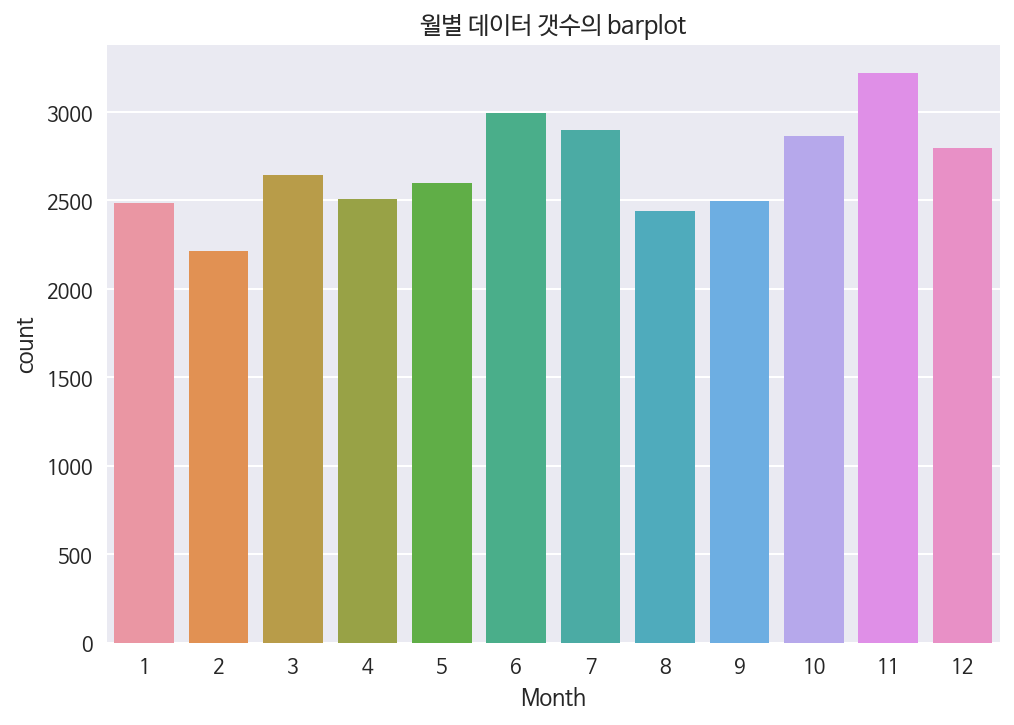

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')
#카테고리별 데이터의 양 확인->countplot
#barplot 은 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성한다. 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.
sns.barplot(x="Month", y="count", data=df1)
plt.title("월별 데이터 갯수의 barplot")
#범례표시
#plt.legend()
plt.show()
#12개의 달 모두 2000건의수가 넘고 2월이 가장작고 11월달 뉴스기사가 가장많다는것을 확인할 수 있다.


### 형태소 분석

##### 한글 형태소 분석기 konlpy 설치

In [4]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##### Okt 함수를 이용해 형태소 분석


##### 연간 최다빈도 단어 TOP 5 형태소분석


In [44]:
from konlpy.tag import Okt
from collections import Counter
news=df['News'].to_list()
# Okt 함수를 이용해 형태소 분석
okt = Okt()
news_data=[]
extend = news_data.extend
line =[]
for num in news:
  line = okt.pos(num)
  n_adj =[]
  # 명사 또는 형용사인 단어만 n_adj에 넣어주기
  for word, tag in line:
      if tag in ['Noun','Adjective']:
          n_adj.append(word)

  #제외할 단어 추가
  stop_words = "하자 곳 도 관 환경 등 명 개 낮 위 첫 곳곳 제 올해 종합 감 날 중 회 종 진 중립 환경부 장관 전국 사업" #추가할 때 띄어쓰기로 추가해주기
  stop_words = set(stop_words.split(' '))

  # 불용어를 제외한 단어만 남기기
  n_adj = [word for word in n_adj if not word in stop_words]
  #print(n_adj)
  extend(n_adj)
counts = Counter(news_data)
tags = counts.most_common(5)
print(tags)

[('탄소', 1848), ('날씨', 1371), ('기후', 1124), ('미세먼지', 1093), ('비', 873)]


##### 연간 최다 빈도 TOP 5 단어 데이터프레임생성

In [45]:
all_words_df=pd.DataFrame(tags)
all_words_df.rename(columns={0: "word", 1: "count"}, inplace=True)
most=all_words_df.sort_values("count",ascending=False)
most

,word,count
0,탄소,1848
1,날씨,1371
2,기후,1124
3,미세먼지,1093
4,비,873


##### 각 월마다(1월~12월) 기사의 빈도수가높은 TOP100 단어 추출 

In [46]:
top100=[]
append2=top100.append
for i in range(1,13):
  news=df['News'][df['Month']==i].to_list()

  # Okt 함수를 이용해 형태소 분석
  okt = Okt()
  all_data_frame=[]
  extend = all_data_frame.extend
  line =[]
  for num in news:
    line = okt.pos(num)
    n_adj =[]
    # 명사 또는 형용사인 단어만 n_adj에 넣어주기
    for word, tag in line:
        if tag in ['Noun','Adjective']:
            n_adj.append(word)
    #제외할 단어 추가
    stop_words = "하자 곳 도 관 환경 등 명 개 낮 위 첫 곳곳 제 올해 종합 감 날 중 회 종 진" #추가할 때 띄어쓰기로 추가해주기
    stop_words = set(stop_words.split(' '))

    # 불용어를 제외한 단어만 남기기
    n_adj = [word for word in n_adj if not word in stop_words]
    extend(n_adj)
  #가장 많이 나온 단어 100개 저장
  counts = Counter(all_data_frame)
  tags = counts.most_common(100)
  #월별 가장많이나온단어100개 월별로저장
  month_most=pd.DataFrame({'month':i,'tags':tags})
  append2(month_most)
  df_concat = pd.concat(top100, axis=0, ignore_index=False)
print("월별 top 100 수집성공")

월별 top 100 수집성공


##### 수집데이터 형태 확인

In [52]:
#각월마다 100개 * 12
df_concat.shape

(1200, 2)

In [51]:
df_concat.head()

,month,tags
0,1,"(미세먼지, 189)"
1,1,"(날씨, 102)"
2,1,"(기후, 101)"
3,1,"(탄소, 100)"
4,1,"(장관, 90)"


##### tags(리스트내의튜플) 데이터를 쪼개서 글자와 빈도수로 나누어 데이터프레임에저장


In [53]:
word= [x[0] for x in df_concat['tags']]
wordcount =[x[1] for x in df_concat['tags']]

df_concat['word']=word
df_concat['wordcount']=wordcount

##### 연간빈도가 가장 높은 단어 5가지를 월별 빈도가 높은 100가지단어와 비교

In [55]:
df_concat['yn']  = df_concat['word'].map(lambda x : most.query("word == '" + x + "' ").word.iloc[0] if len(most.query("word == '" + x + "' ")) > 0 else 'nan')
print(df_concat)

    month         tags  word  wordcount    yn
0       1  (미세먼지, 189)  미세먼지        189  미세먼지
1       1    (날씨, 102)    날씨        102    날씨
2       1    (기후, 101)    기후        101    기후
3       1    (탄소, 100)    탄소        100    탄소
4       1     (장관, 90)    장관         90   nan
..    ...          ...   ...        ...   ...
95     12     (국제, 30)    국제         30   nan
96     12     (평가, 30)    평가         30   nan
97     12     (중단, 30)    중단         30   nan
98     12     (광주, 29)    광주         29   nan
99     12     (대응, 29)    대응         29   nan

[1200 rows x 5 columns]


##### TOP5 단어에 포함되는 데이터만출력


In [57]:
df_con=df_concat[df_concat['yn'] != 'nan']
df_con.head()

,month,tags,word,wordcount,yn
0,1,"(미세먼지, 189)",미세먼지,189,미세먼지
1,1,"(날씨, 102)",날씨,102,날씨
2,1,"(기후, 101)",기후,101,기후
3,1,"(탄소, 100)",탄소,100,탄소
37,1,"(비, 46)",비,46,비


##### 주요 TOP5키워드별 월별 BAR PLOT

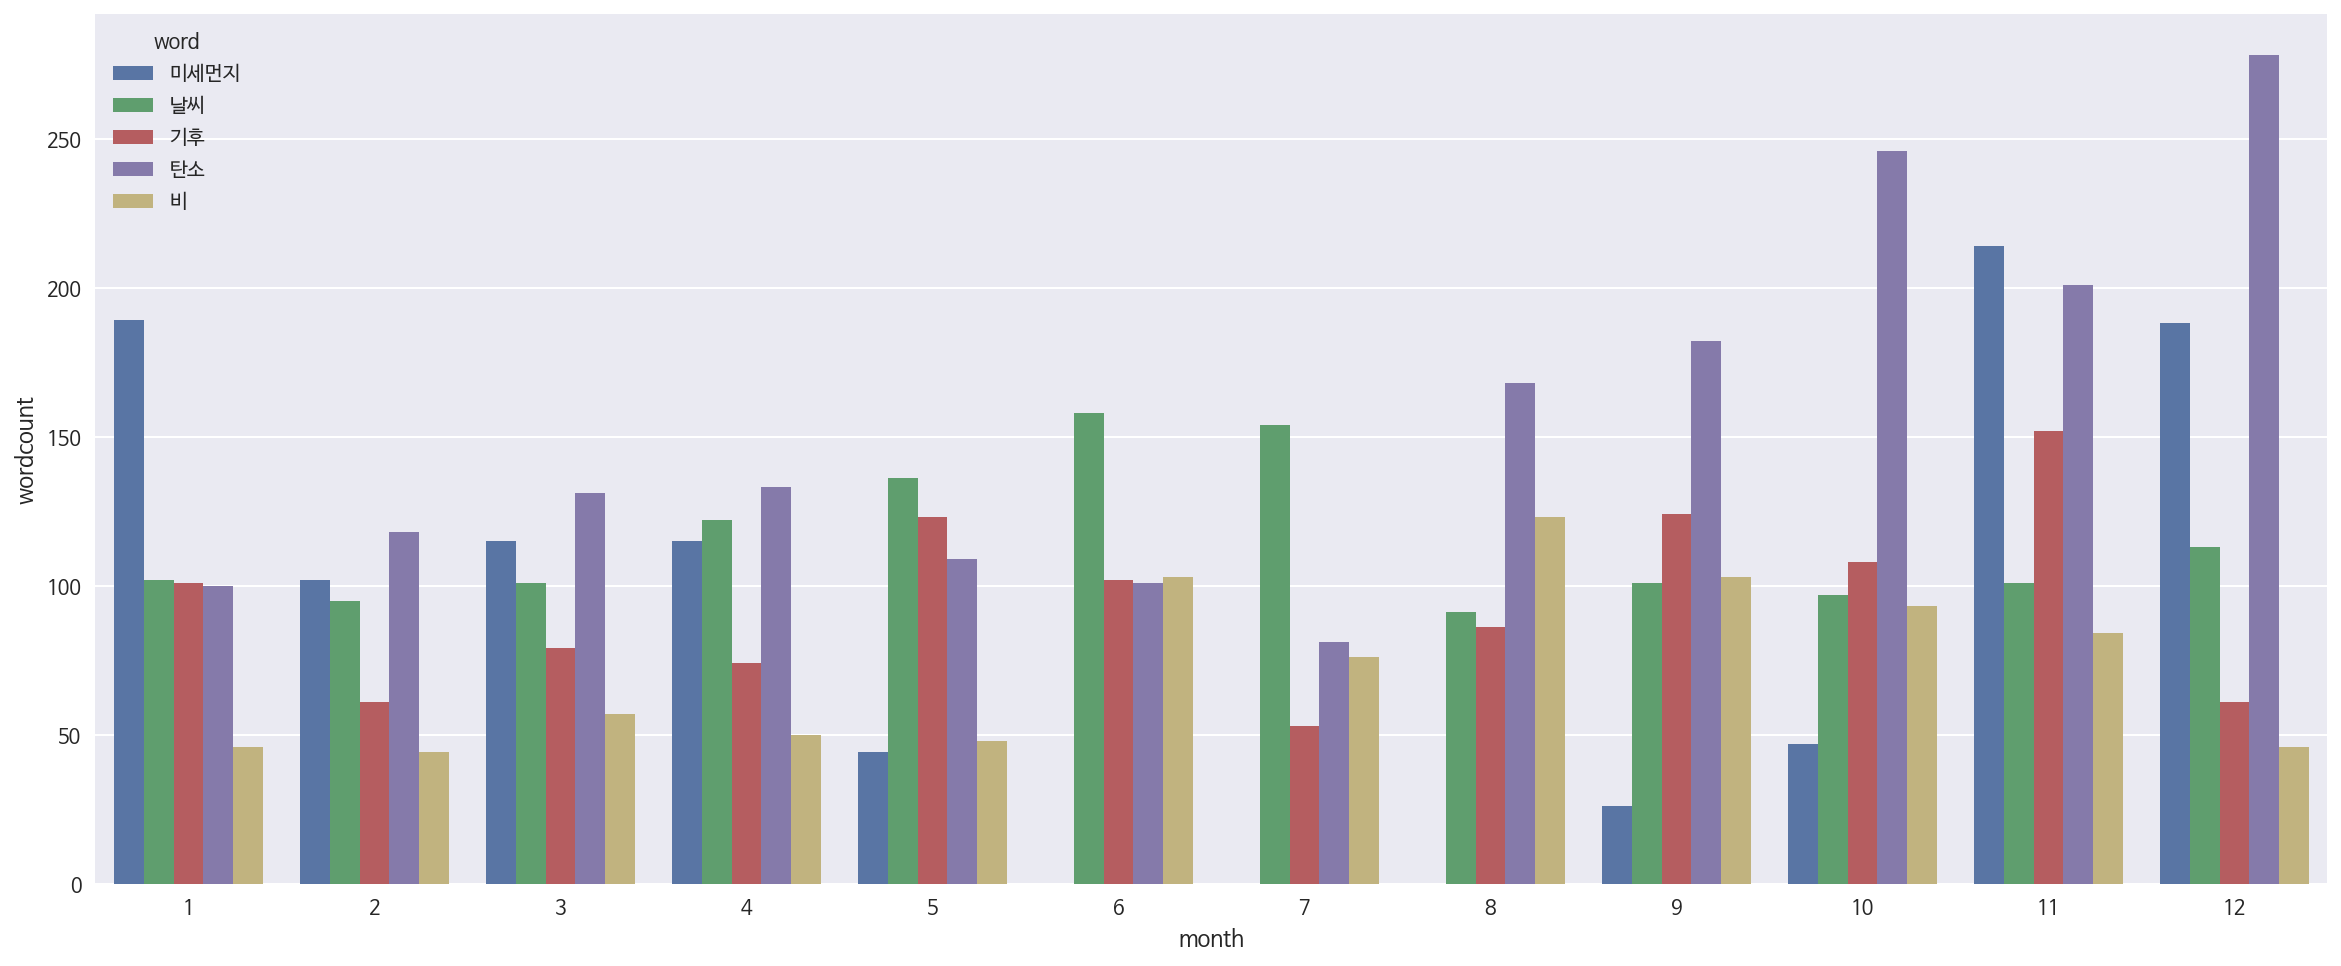

In [58]:
plt.figure(figsize=(20,8))
ax=sns.barplot(x='month',y='wordcount',hue='word',data=df_con)
plt.show()

* 겨울인 11,12,1월에 미세먼지관련 기사가 많았던것을 확인 할 수 있다.
* 탄소는 일년내내 꾸준한 기사가 났지만 12월에 가장 두드러지게 나타났다.
* 여름기간에 비 관련 기사가 많았던것을 확인할수 있다.

##### 주요 TOP5키워드별 월별 LMPLOT 
* 선형관계파악가능

<Figure size 1440x576 with 0 Axes>

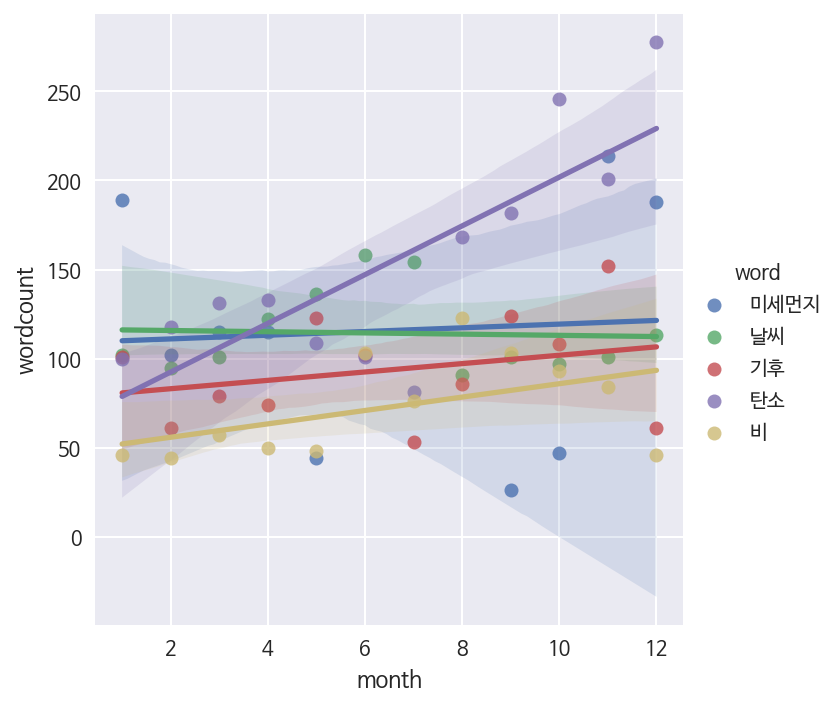

In [66]:
plt.figure(figsize=(20,8))
sns.lmplot(x='month',y='wordcount',hue='word',data=df_con)
plt.show()

#### 연간 빈도수를 이용한 워드 클라우드 생성 

In [69]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Okt 함수를 이용해 형태소 분석
news=df['News'].to_list()
okt = Okt()
all_data_frame1=[]
append = all_data_frame1.extend
line =[]
for num in news:
  line = okt.pos(num)
  n_adj =[]
  # 명사 또는 형용사인 단어만 n_adj에 넣어주기
  for word, tag in line:
      if tag in ['Noun','Adjective']:
          n_adj.append(word)
  #print(n_adj)
  #제외할 단어 추가
  stop_words = "하자 곳 도 관 환경 등 명 개 낮 위 첫 곳곳 제 올해 종합 감 날 중 회 종 진 장관 포 자" #추가할 때 띄어쓰기로 추가해주기
  stop_words = set(stop_words.split(' '))
  # 불용어를 제외한 단어만 남기기
  n_adj = [word for word in n_adj if not word in stop_words]
  #print(n_adj)
  append(n_adj)

# #가장 많이 나온 단어 100개 저장
counts1 = Counter(all_data_frame1)
tags1 = counts1.most_common(100)

#print(tags1)
#1년간 가장많이나온단어100개
top100=pd.DataFrame({'tags':tags1})
print("연간빈도수 TOP100 수집 완료")

연간빈도수 TOP100 수집 완료


##### 이미지 추가(워드크라우드 모양 설정)

In [80]:
import numpy as np
from PIL import Image

mask = Image.new("RGBA",(640,613), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
image = Image.open('/content/sample_data/heart2.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

##### 1년간 환경뉴스 최다빈도수 TOP 100 WordCloud(워드크라우드) 만들기

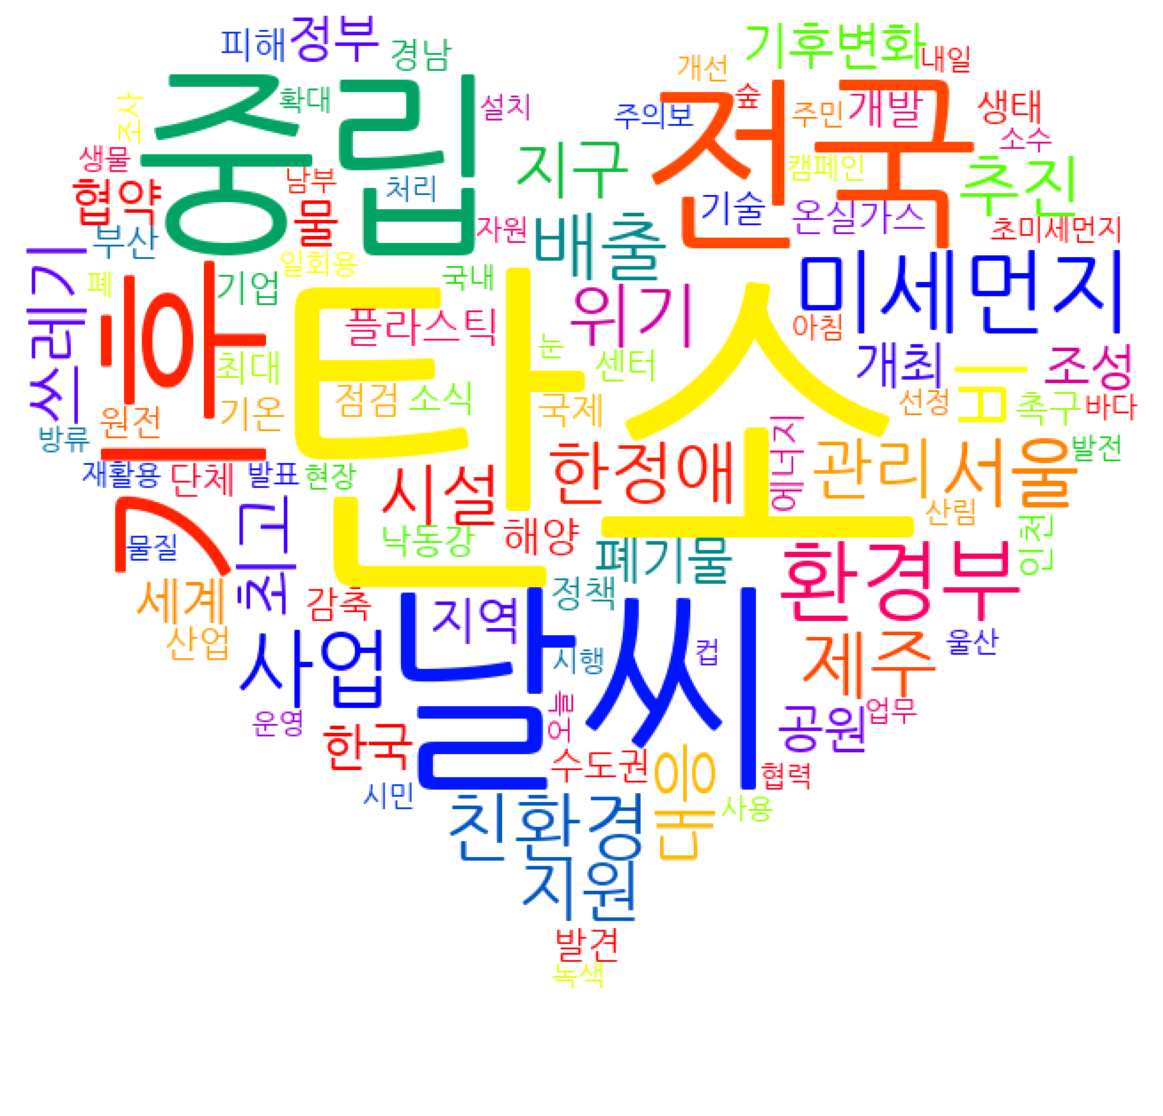

In [81]:
from wordcloud import WordCloud
#폰트지정
font='/content/sample_data/NanumGothic.ttf'
word_cloud = WordCloud(font_path=font, background_color='white',max_font_size=200, mask=mask,colormap='prism').generate_from_frequencies(dict(tags1))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장

plt.savefig('news.png', bbox_inches='tight')
plt.show()

##### 탄소중립선언과 행동에 미온적 태도를 보이던 주요국이 앞다퉈 탄소 배출량 '제로'를 선언하면서 최근 1년간 환경뉴스엔 탄소 중립, 탄소 배출 ,녹색,친환경등의 키워드가 가장 많이 쓰였던것으로 보인다.
##### 그외에 22년 호랑이 해를 맞아 호랑이 ,한정애 환경부장관 등 매년 또는 일정 기간 마다 비뀌는 키워드와 미세먼지/초미세먼지/영하/한파/추위/날씨/눈/비 등의 날씨관련 키워드들이 많이 쓰인것으로 보인다.

#### 여름 (6/7/8월) 워드클라우드 생성

In [93]:
#여름 6,7,8
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

summer=[]
append_summer=summer.append
list1=[6,7,8]
for i in range(0,len(list1)):
  news=df['News'][df['Month']==list1[i]].to_list()
  # Okt 함수를 이용해 형태소 분석
  okt = Okt()
  all_data_frame=[]
  extend = all_data_frame.extend
  line =[]
  for num in news:
    line = okt.pos(num)
    n_adj =[]
    # 명사 또는 형용사인 단어만 n_adj에 넣어주기
    for word, tag in line:
        if tag in ['Noun','Adjective']:
            n_adj.append(word)
    #print(n_adj)

    #제외할 단어 추가
    stop_words = "하자 곳 도 관 환경 등 명 개 낮 위 첫 곳곳 제 올해 종합 감 날 중 회 종 진 환경부 장관 포 자 탄소 중립 한정애 전국 날씨" #추가할 때 띄어쓰기로 추가해주기
    stop_words = set(stop_words.split(' '))

    # 불용어를 제외한 단어만 남기기
    n_adj = [word for word in n_adj if not word in stop_words]
    #print(n_adj)
    extend(n_adj)
  #가장 많이 나온 단어 100개 저장
  counts = Counter(all_data_frame)
  tags = counts.most_common(100)

  #월별 가장많이나온단어100개 월별로저장
  summer_most=pd.DataFrame({'month':list1[i],'tags':tags})
  append_summer(summer_most)
  df_concat_summer = pd.concat(summer, axis=0, ignore_index=False)
print("여름 단어 수집완료")


여름 단어 수집완료


In [94]:
# 이미지 추가(워드크라우드 모양 설정)
import numpy as np
from PIL import Image

#mask = Image.new("RGBA",(424,369), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
mask = Image.new("RGBA",(640,613), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
#image = Image.open('/content/drive/MyDrive/heart2.png').convert("RGBA")
image=Image.open('/content/sample_data/heart2.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)


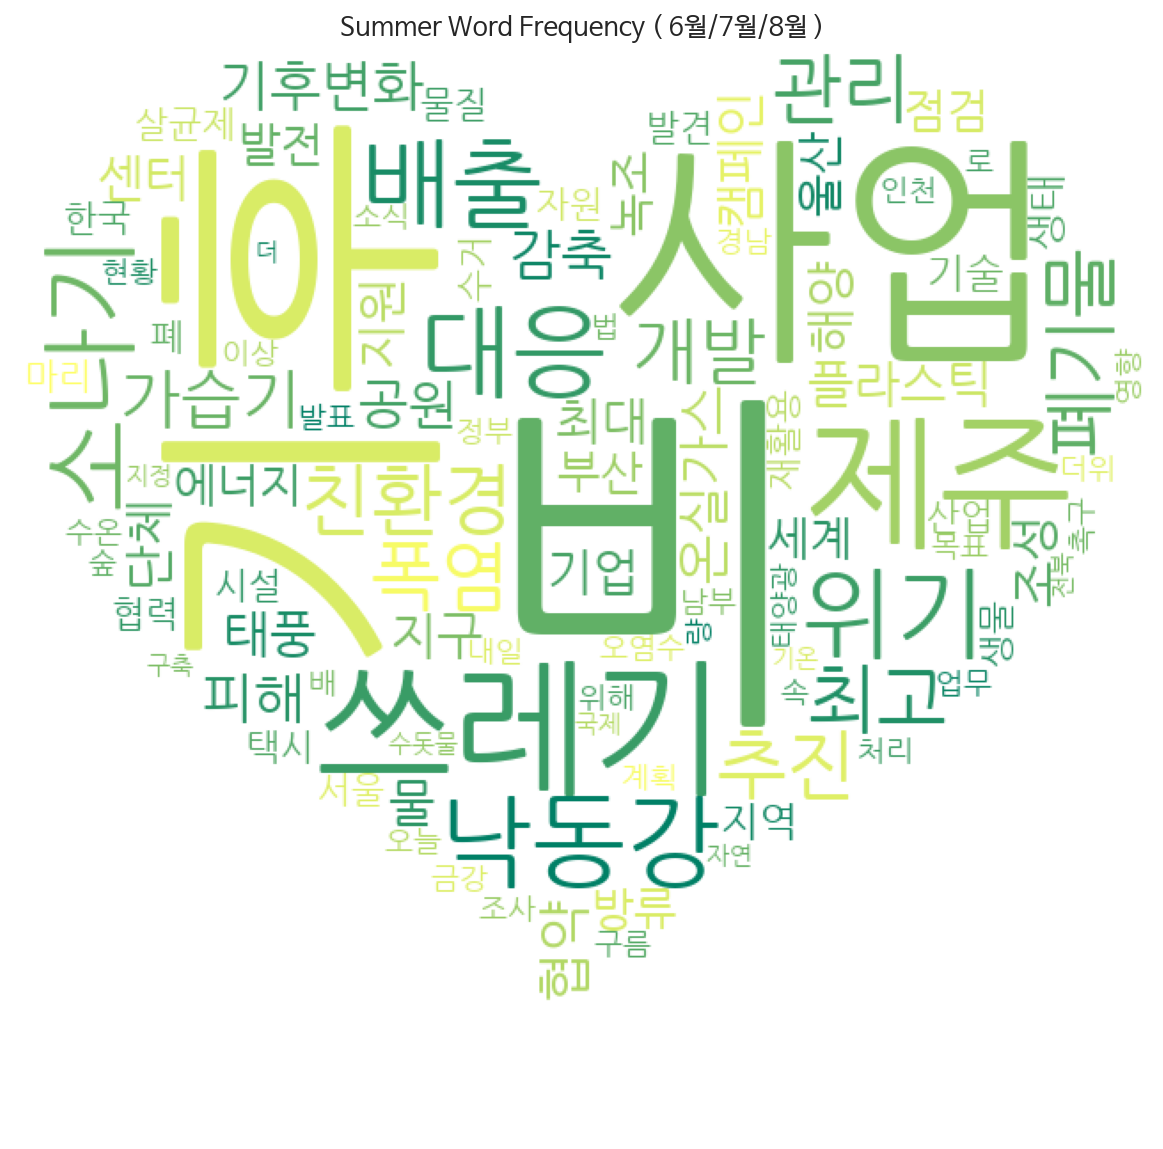

In [96]:
from wordcloud import WordCloud
###WordCloud(워드크라우드) 만들기###
#폰트지정
#font='/content/drive/MyDrive/BMDOHYEON_ttf.ttf'
font='/content/sample_data/NanumGothic.ttf'
word_cloud = WordCloud(font_path=font, background_color='white',max_font_size=200, mask=mask,colormap='summer').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.title("Summer Word Frequency ( 6월/7월/8월 )", size = 13) # 제목 지정
plt.axis('off')

#워드클라우드 사진으로 저장
#cloud.to_file('.png')
#또는
plt.savefig('Summer1.png', bbox_inches='tight')
plt.show()

* 여름의 가장 큰 키워드는 비 : 계절적 특성
* 21.08월  카자흐스탄 환경장관과 회담 & 에코스쿨 업무협약식&낙동강 보 개방 및 4대강 회복 방안 논의 & 무공해택 관련기사多  
    -> 한정애장관님 언급 多
* 제주 -유해물질 검출 ,멸종위기종 남방큰돌고래 사체 발견

##### 연관분석
* Mlxtend의 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석을 수행
- 연관 규칙(association rules)은 분석가가 필요로 하는 규칙만을 추출하기 위한 척도들을 사용

###### Mlxtend(machine learning extensions)
  * 일상적인 데이터 사이언스 작업에 유용한도구들로 구성된 파이썬 라이브러리


In [97]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# APRIORI

# 9월 기사를 이용한 연관규칙분석

### 연관규칙 분석 _ 지지도, 신뢰도, 향상도 , Apriori, 빈발항목
* 항목들 간의 관계를 얻기 위해 한 항목의 존재가 다른 항목의 존재를 암시하는 조합을 발견하는 분석방법
* 지지도는 X->Y = Y->X (상호대칭)
* 신뢰도는 X->Y ≠ Y->X (지지도가 낮아도 신뢰도가 높은 경우 유용한 규칙)
* 향상도는 X->Y = Y->X (상호대칭)
  * L > 1 : 양의 상관관계 (같이 구매할 확률 높음)
  * L < 1 : 음의 상관관계 (같이 구매할 확률 낮음)
  * L = 1 : 독립적 상관관계 (서로 영향 미치지 않음)

In [2]:
#한나눔불러오기
import pandas as pd
import re
from konlpy.tag import Hannanum
hannanum = Hannanum()

##### 9월달 기사의 단어들만 2차원리스트로 추출

In [13]:
from konlpy.tag import Okt
from collections import Counter
df=pd.read_excel('/content/sample_data/1year_environment_issue.xlsx', header=None, index_col=None)
df.rename(columns={0: "News", 1: "Date"}, inplace=True)
df['DateTime'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m%d')
df['Year'] = df['DateTime'].dt.year 
df['Month'] = df['DateTime'].dt.month 
df.head()
#9월뉴스만 추출
news=df['News'][df['Month']==9].to_list()
okt = Okt()
dataset=[]
append = dataset.append
line =[]
for num in news:
  line = okt.pos(num)
  n_adj =[]
  # 명사 또는 형용사인 단어만 n_adj에 넣어주기
  for word, tag in line:
      if tag in ['Noun','Adjective']:
          n_adj.append(word)
  #print(n_adj)
  #제외할 단어 추가
  stop_words = "하자 곳 도 관 환경 등 명 개 낮 위 첫 곳곳 제 올해 종합 감 날 중 회 종 진 장관 포 자 전 배 검 슬 년" #추가할 때 띄어쓰기로 추가해주기
  stop_words = set(stop_words.split(' '))
  # 불용어를 제외한 단어만 남기기
  n_adj = [word for word in n_adj if not word in stop_words]
  append(n_adj)

[['세계', '나무', '종류', '멸종위기', '종은'], ['날씨', '전국', '비', '최고', '기온'], ['경남', '교육청', '종이', '용량', '탄소', '다이어트', '추진'], ['기준', '대기오염', '인류', '수명', '연장'], ['춘천시', '피해', '보상', '신청'], ['청년', '온실가스', '이상', '감축', '대안', '시나리오', '제출'], ['기후', '관련', '재해', '급증', '피해', '액'], ['부산', '아쿠아리움', '제주도', '방류', '바다거북', '마리', '국내', '정착', '가능성', '높아'], ['광명시', '탄소', '생활', '실천', '기후', '의병', '조직'], ['통영', '해양', '보호', '구역', '보호', '생물', '달랑', '서식'], ['대구', '구미', '낙동강', '물', '모두', '급수', '취', '수원', '이전', '반대'], ['통영', '해양', '보호', '구역', '보호', '생물', '달랑', '서식'], ['제주', '방류', '붉은이', '남해', '이동', '국내', '연안', '정착', '가능성'], ['충주', '호암', '안전성', '등급', '보수', '공사'], ['폐쇄', '농장', '식용', '논란', '진도군', '농장', '실태', '일제', '조사'], ['큰일', '벌초', '말', '벌집', '때', '대처', '법'], ['수술실', '설치', '법', '통과', '성숙한', '입법', '사례'], ['장세용', '구미시장', '선거', '생각', '취', '수원', '조건', '부', '찬성'], ['전세계', '수종', '멸종위기', '기후변화', '벌목', '영향'], ['경남', '의회', '의장', '플라스틱', '캠페인', '동참'], ['무주군', '남대천', '천연기념물', '어름치', '방류'], ['무주군', '남대천', '천연기념물', '어름치', '방류'], ['동정', '경

In [14]:
dataset[:10]

[['세계', '나무', '종류', '멸종위기', '종은'],
 ['날씨', '전국', '비', '최고', '기온'],
 ['경남', '교육청', '종이', '용량', '탄소', '다이어트', '추진'],
 ['기준', '대기오염', '인류', '수명', '연장'],
 ['춘천시', '피해', '보상', '신청'],
 ['청년', '온실가스', '이상', '감축', '대안', '시나리오', '제출'],
 ['기후', '관련', '재해', '급증', '피해', '액'],
 ['부산', '아쿠아리움', '제주도', '방류', '바다거북', '마리', '국내', '정착', '가능성', '높아'],
 ['광명시', '탄소', '생활', '실천', '기후', '의병', '조직'],
 ['통영', '해양', '보호', '구역', '보호', '생물', '달랑', '서식']]

### Mlxtend의 Apriori 알고리즘을 적용하여 연관규칙분석수행

###### TransactionEncoder
  * 파이선 리스트의 트랜잭션 데이터에 대한 인코더 클래스 정의

In [15]:
#트랜잭션 인코더
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df= pd.DataFrame(te_ary,columns=te.columns_)
df[['탄소','중립','환경부','기후','비']].head(10)

,탄소,중립,환경부,기후,비
0,False,False,False,False,False
1,False,False,False,False,True
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,True,False,False,True,False
9,False,False,False,False,False


##### 항목 개수가 2개이고 지지도(support)가 0.01 이상인 항목집합만 추려낸 결과
    * 지지도는 절대 신뢰도보다 높을 수 없다. 같거나 낮을 수 밖에 없는 수치이다.
    * 지지도로 인해서, 일정 이상의 데이터만 가져오고, 특정 이상값의 신뢰도를 추천한다

In [17]:
from mlxtend.frequent_patterns import apriori
#지지도
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[(frequent_itemsets['length'] == 2 ) & 
                  (frequent_itemsets['support'] >=0.01)].sort_values(by='support',ascending=False).head(10)

,support,itemsets,length
109,0.055288,"(탄소, 중립)",2
102,0.023638,"(기후, 위기)",2
108,0.022035,"(추석, 연휴)",2
104,0.017628,"(비, 날씨)",2
110,0.016026,"(찬투, 태풍)",2
106,0.014423,"(비, 전국)",2
103,0.012821,"(기후, 행동)",2
101,0.011218,"(날씨, 교차)",2
105,0.010417,"(전국, 날씨)",2
100,0.010016,"(온실가스, 감축)",2


##### 신뢰도가 0.7이상인 연관규칙나열 antecedent(전항)과 consequent(후항)컬럼확인

In [18]:
#신뢰도(confidence) : P(B/A)= P(A교B)
#향상도(lift) : P(B/A) / P(B)
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets,metric='confidence',
                  min_threshold=0.7).sort_values(by='lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(순환),(자원),0.010016,0.019231,0.010016,1.000000,52.000000,0.009823,inf
7,(찬투),(태풍),0.017628,0.021234,0.016026,0.909091,42.813036,0.015651,10.766426
8,(태풍),(찬투),0.021234,0.017628,0.016026,0.754717,42.813036,0.015651,4.005054
3,(추석),(연휴),0.029647,0.026042,0.022035,0.743243,28.540541,0.021263,3.793311
4,(연휴),(추석),0.026042,0.029647,0.022035,0.846154,28.540541,0.021263,6.307292
0,(위기),(기후),0.027644,0.048478,0.023638,0.855072,17.638520,0.022298,6.565505
1,(행동),(기후),0.015224,0.048478,0.012821,0.842105,17.371031,0.012082,6.026309
5,(탄소),(중립),0.071715,0.055288,0.055288,0.770950,13.944134,0.051323,4.124472
6,(중립),(탄소),0.055288,0.071715,0.055288,1.000000,13.944134,0.051323,inf


##### (연휴) -> (추석)은 양의 상관관계를 갖고있음을 알 수있다.

In [20]:
#4번개체 (연휴) -> (추석) 신뢰도와 향상도를 직접계산
print('(연휴) -> (추석)규칙의 지지도: ' + str(format(0.022035,".6f")))
print('(연휴) -> (추석)규칙의 신뢰도 : ' + str(format(0.022035/0.029647,".6f")))
print('(연휴) -> (추석)규칙의 향상도 : ' + str(format((0.022035/0.029647	)/0.026042,".6f")))

(연휴) -> (추석)규칙의 지지도: 0.022035
(연휴) -> (추석)규칙의 신뢰도 : 0.743246
(연휴) -> (추석)규칙의 향상도 : 28.540263


* 지지도와 신뢰도는 확률의 개념이므로 1에 가까울수록 연관성이 높다
* 향상도를 평가도구로 사용하여 판단해볼때 향상도가 1보다 크기에 (연휴)->(추석)은 양의 상관관계가 있다고 말할 수있다.